In [1]:
#Clustering Algorithms Exercise
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
from scipy.spatial import distance_matrix
from sklearn.cluster import KMeans

In [2]:
## Data Preprocessing
USArrest = pd.read_csv("https://forge.scilab.org/index.php/p/rdataset/source/file/master/csv/datasets/USArrests.csv")
USArrest = USArrest.set_index('Unnamed: 0')
USArrest.isnull().sum(axis=0)
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(USArrest)
df_normalized = pd.DataFrame(np_scaled, columns=USArrest.columns, index=USArrest.index)
df_normalized.describe()

,Murder,Assault,UrbanPop,Rape
count,50.000000,50.000000,50.000000,50.000000
mean,0.420964,0.430685,0.568475,0.360000
std,0.262380,0.285403,0.245335,0.242025
min,0.000000,0.000000,0.000000,0.000000
25%,0.197289,0.219178,0.381356,0.200904
50%,0.388554,0.390411,0.576271,0.330749
75%,0.629518,0.698630,0.775424,0.487726
max,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:xlabel='Unnamed: 0', ylabel='Unnamed: 0'>

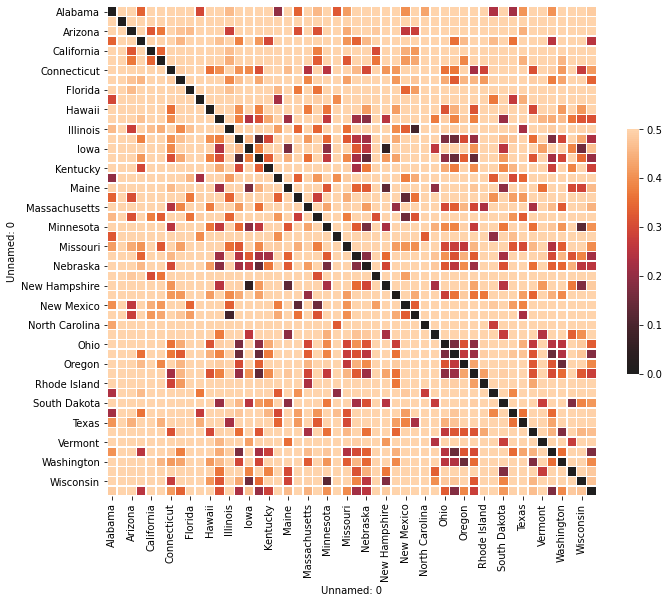

In [3]:
## Visualize the Data 
dist_matrix = pd.DataFrame(distance_matrix(df_normalized.values,
                           df_normalized.values, p=2),
                           index=df_normalized.index,
                           columns=df_normalized.index)
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(dist_matrix, vmax=.5, center=0, square=True, 
            linewidths=.5, cbar_kws={"shrink": .5})

In [4]:
## KMeans Clustering using *sklearn*

kmeans = KMeans(n_clusters=2, n_init=25, max_iter=100, random_state=6)
kmeans.fit(df_normalized)
kmeans.__dict__.keys()
kmeans.labels_

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0])

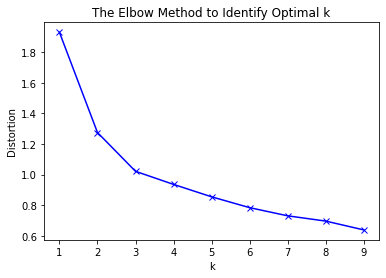

In [5]:
## Elbow Method (Codes)

from scipy.spatial.distance import cdist
distortions = []
K = range(1, 10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(dist_matrix)
    kmeanModel.fit(dist_matrix)
    distortions.append(sum(np.min(cdist(dist_matrix, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / dist_matrix.shape[0])
    
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method to Identify Optimal k')
plt.show()

C:\Users\XILUJ\anaconda3\lib\site-packages\scipy\cluster\hierarchy.py:826: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


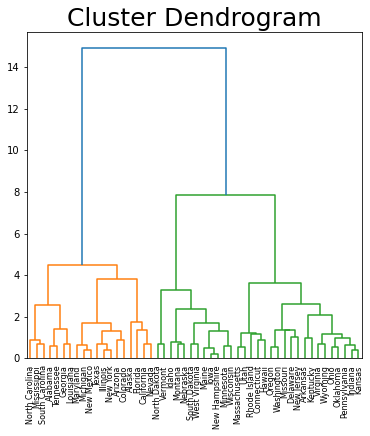

In [6]:
from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(dist_matrix)

fig, ax = plt.subplots(figsize=(6, 6))
ax.grid(False)
ax.set_title('Cluster Dendrogram', fontsize = 25)
ax = dendrogram(linkage_matrix, orientation='top', labels=dist_matrix.index)
plt.xticks(fontsize=8)
plt.show()
